***Exploring Student Data***

Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

How are students performing in their math classes?
What do students’ parents do for work?
How often are students absent from school?
In this project, you’ll explore and summarize some student data in order to answer these questions.

**Initial exploration**

The provided dataframe (saved as students) includes the following variables/features:

* 'address': the location of the student’s home ('U' for urban and 'R' for rural)
* 'absences': the number of times the student was absent during the school year
* 'Mjob': the student’s mother’s job industry
* 'Fjob': the student’s father’s job industry
* 'math_grade': the student’s final grade in math, ranging from 0 to 20

Use the pandas .head() method to inspect the first few rows of data.


In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
students = pd.read_csv('students.csv')
# Print first few rows of data
print(students.head())

  address  absences     Mjob      Fjob  math_grade
0       U         6  at_home   teacher           6
1       U         4  at_home     other           6
2       U        10  at_home     other          10
3       U         2   health  services          15
4       U         4    other     other          10


Use the pandas .describe() method to print out summary statistics for all five features in the dataset. Inspect the output. Do more students live in urban or rural locations?

In [4]:
# Print summary statistics for all columns
print(students.describe(include='all'))

       address    absences   Mjob   Fjob  math_grade
count      395  395.000000    395    395  395.000000
unique       2         NaN      5      5         NaN
top          U         NaN  other  other         NaN
freq       307         NaN    141    217         NaN
mean       NaN    5.708861    NaN    NaN   10.415190
std        NaN    8.003096    NaN    NaN    4.581443
min        NaN    0.000000    NaN    NaN    0.000000
25%        NaN    0.000000    NaN    NaN    8.000000
50%        NaN    4.000000    NaN    NaN   11.000000
75%        NaN    8.000000    NaN    NaN   14.000000
max        NaN   75.000000    NaN    NaN   20.000000


Let’s start by trying to summarize the math_grade column. Calculate and print the mean, median and mode value of math_grade.

In [23]:
# Calculate mean
math_grade_mean = students.math_grade.mean()
print(round(math_grade_mean, 1))

10.4


In [6]:
# Calculate median
math_grade_median = students.math_grade.median()
print(math_grade_median)

11.0


In [7]:
# Calculate mode
math_grade_mode = students.math_grade.mode()
print(math_grade_mode)

0    10
dtype: int64


Summarize the spread of student grades. Calculate and print the range, standart deviation and mean absolute deviation of the math_grade column.

In [8]:
# Calculate range
math_grade_range = students.math_grade.max() - students.math_grade.min()
print(math_grade_range)

20


In [22]:
math_grade_std = students.math_grade.std()
print(round(math_grade_std, 1))

4.6


The standard deviation is about 4.6, while the average grade is about 10.4. This means that about two thirds of students are earning a grade between 5.8 (calculated as 10.4 - 4.6) and 15 (calculated as 10.4 + 4.6).

In [24]:
# Calculate MAD
math_grade_mad = students.math_grade.mad()
print(round(math_grade_mad, 1))

3.4


Visualize the distribution of student grades

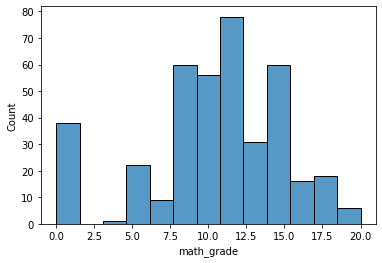

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a histogram of math grades
sns.histplot(x='math_grade', data=students)
plt.show()
plt.clf()

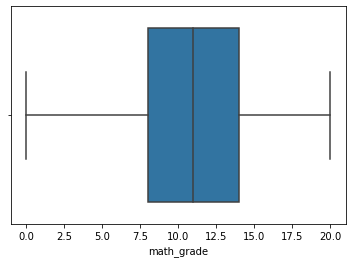

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a box plot of math grades
sns.boxplot(x='math_grade', data=students)
plt.show()
plt.clf()

Summarize mothers' jobs

In [14]:
# Calculate number of students with mothers in each job category
print(students.Mjob.value_counts())
# 'other' category is most common

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


In [15]:
# Calculate proportion of students with mothers in each job category
print(students.Mjob.value_counts(normalize=True))
# 8.6% of students mothers work in health industry

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64


Visualize the distribution of mothers' jobs

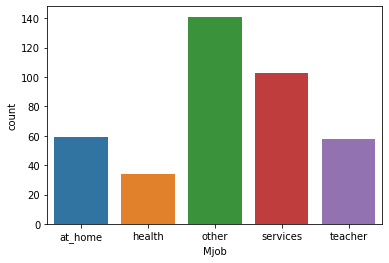

<Figure size 432x288 with 0 Axes>

In [16]:
# Create bar chart of Mjob
sns.countplot(x='Mjob', data=students)
plt.show()
plt.clf()

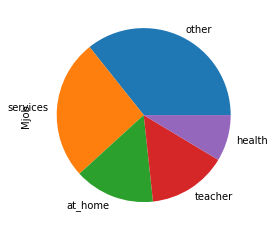

<Figure size 432x288 with 0 Axes>

In [17]:
# Create pie chart of Mjob
students.Mjob.value_counts().plot.pie()
plt.show()
plt.clf()

There are still a few more columns in this dataset that we haven’t looked at carefully:

* 'address': the location of the student’s home ('U' for urban and 'R' for rural)
* 'absences': the number of times the student was absent during the school year
* 'Fjob': the student’s father’s job industry

In [26]:
# Calculate proportion of students who live in urban and rural
print(students.address.value_counts(normalize=True))
# 78% live in urban area and 22% live in rural area

U    0.777215
R    0.222785
Name: address, dtype: float64


5.7
4.2


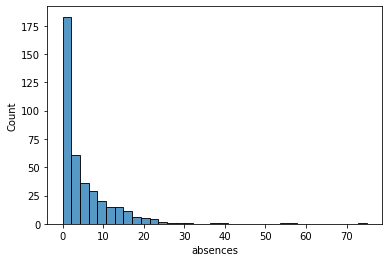

<Figure size 432x288 with 0 Axes>

In [27]:
# Calculate absences mean
absences_mean = students.absences.mean()
print(round(absences_mean, 1))
# Calculate treamed mean for absences removing 10% of lowest and highest data points
from scipy.stats import trim_mean
trmean_absences = trim_mean(students.absences, proportiontocut=0.1) 
print(round(trmean_absences, 1))

# Create a histogram of absences
sns.histplot(x='absences', data=students)
plt.show()
plt.clf()


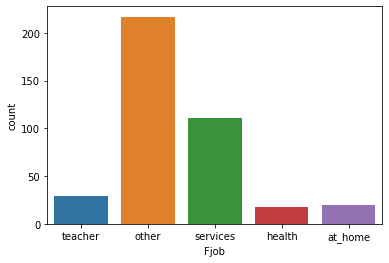

<Figure size 432x288 with 0 Axes>

In [28]:
# Create bar chart of Fjob
sns.countplot(x='Fjob', data=students)
plt.show()
plt.clf()